In [28]:
### Notes on 7D35
# Human LC8 bound to ebola virus VP35(67-76)

In [29]:
#Imports
import MDAnalysis as mda
from MDAnalysis import Universe
import MDAnalysis.tests.datafiles
from MDAnalysis.tests.datafiles import PSF, DCD, GRO, XTC
import MDAnalysis.analysis.base as AnalysisBase
from MDAnalysis.analysis import align, rms
from MDAnalysis.analysis.rms import RMSF

import matplotlib.pyplot as plt
import numpy as np

In [30]:
#loading various file types
pdb = mda.Universe('step3_input.pdb', permissive=True)
gro = mda.Universe('step3_input.gro', permissive=True)
xtc = mda.Universe('7D35_md_100ns.xtc', permissive=True)
#tpr = mda.Universe('7D35_md_100ns.tpr', permissive=True)

# topology and traj files to create universe 
universe1 = mda.Universe('7D35_md_100ns.tpr', '7D35_md_100ns.xtc')
#simplify
u1 = universe1

xtc_a = mda.Universe('7D35_md_100nsa.xtc', permissive=True)
universe2 = mda.Universe('7D35_md_100nsa.tpr', '7D35_md_100nsa.xtc')
u2 = universe2

xtc_b = mda.Universe('7D35_md_100nsb.xtc', permissive=True)
universe3 = mda.Universe('7D35_md_100nsb.tpr', '7D35_md_100nsb.xtc')
u3 = universe3


OSError: Failed to load from the topology file 7D35_md_100ns.xtc with parser <class 'MDAnalysis.topology.MinimalParser.MinimalParser'>.
Error: File does not exist: b'7D35_md_100ns.xtc'

In [5]:
# print(len(u1.trajectory), len(u2.trajectory), len(u3.trajectory))

### C-alpha RMSD
- measures the distances in angstroms between the C-alpha atoms of 2 aligned residues
using ```rmsd()```

In [7]:
ref = mda.Universe('step3_input.pdb', permissive=True)
mobile = mda.Universe('7D35_md_100ns.tpr', '7D35_md_100ns.xtc')
mobile_CA = mobile.select_atoms("name CA")
ref_CA = ref.select_atoms("name CA")
MDAnalysis.analysis.rms.rmsd(mobile_CA.positions, ref_CA.positions)

FileNotFoundError: [Errno 2] No such file or directory: '7D35_md_100ns.tpr'

In [8]:
Pure rotation with translational superposition with respect to the centres of mass (or geometry) 

SyntaxError: invalid syntax (Temp/ipykernel_23512/2271297721.py, line 1)

In [9]:
MDAnalysis.analysis.rms.rmsd(mobile.select_atoms('name CA').positions, ref.select_atoms('name CA').positions, center=True)

NameError: name 'mobile' is not defined

In [10]:
Rotation matrix superimposed mobile on ref while minimizing the CA-RMSD is obtained with the ```rotation_matrix()``` function gives:

SyntaxError: invalid syntax (Temp/ipykernel_23512/1893467233.py, line 1)

In [11]:
MDAnalysis.analysis.rms.rmsd(mobile.select_atoms('name CA').positions, ref.select_atoms('name CA').positions, superposition=True)

NameError: name 'mobile' is not defined

In [12]:
The rotation matrix that superimposes _mobile_ on _ref_ while minimizing the CA-RMSD is obtained with the ```rotation_matrix()``` function

SyntaxError: invalid syntax (Temp/ipykernel_23512/655746478.py, line 1)

In [13]:
mobile0 = mobile.select_atoms('name CA').positions - mobile.atoms.center_of_mass()
ref0 = ref.select_atoms('name CA').positions - ref.atoms.center_of_mass()
R, rmsd = align.rotation_matrix(mobile0, ref0)
print(rmsd)
print(R)

NameError: name 'mobile' is not defined

In [14]:
### Equilibrium Check

In [15]:
filename = "7D35_energy100ns1-3-4.xvg"
time, bond, proper_dihedrals, improper_dihedrals = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time.append(float(t))
        bond.append(float(b))
        proper_dihedrals.append(float(p_d))
        improper_dihedrals.append(float(i_d))

filename= "7D35_energy100ns12-13-14.xvg"
time, potential, kinetic, total_energy = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time.append(float(t))
        potential.append(float(b))
        kinetic.append(float(p_d))
        total_energy.append(float(i_d))
        
filename= "7D35_energy100ns16-17-18.xvg"
time, temperature, pressure, constr_rmsd = [], [], [], []
with open(filename) as file:
    for line in file.readlines():
        if line[0] == '@': continue
        if line[0] == '#': continue
        t, b, p_d, i_d = line.split()
        time.append(float(t))
        temperature.append(float(b))
        pressure.append(float(p_d))
        constr_rmsd.append(float(i_d))

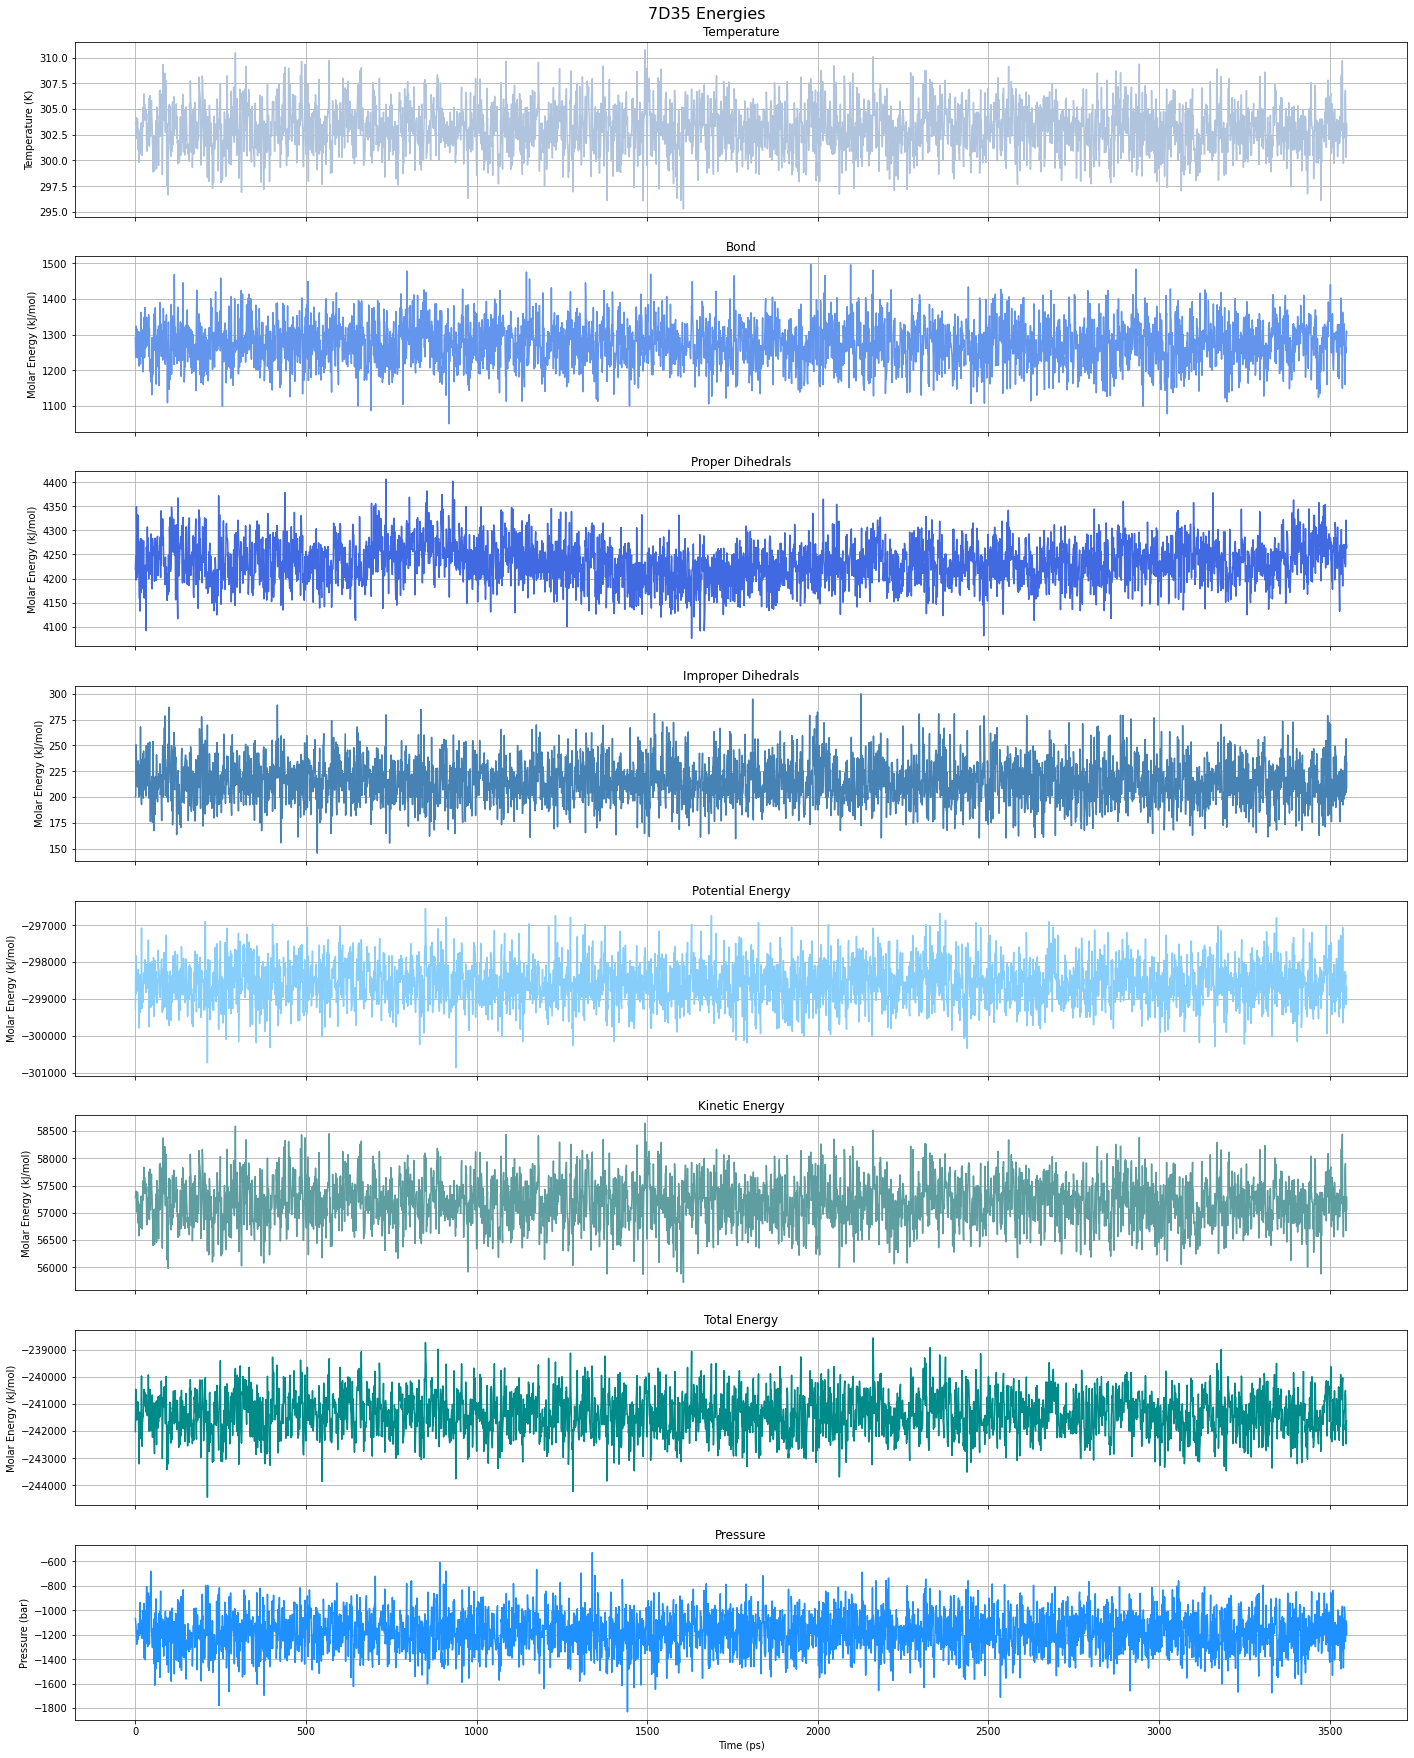

In [16]:
fig, axs = plt.subplots(8, figsize=(20,25), sharex=True)

axs[0].title.set_text('Temperature')
axs[0].plot(time, temperature, 'lightsteelblue')
axs[0].set_ylabel("Temperature (K)")
axs[0].grid()

# ax2 = axs[0].twinx()  # instantiate a second axes that shares the same x-axis
# ax2.set_ylabel("")  # we already handled the x-label with ax1
# ax2.plot(time, ###, "orange")

axs[1].title.set_text('Bond')
axs[1].plot(time, bond, "cornflowerblue")
axs[1].set_ylabel("Molar Energy (kJ/mol)")
axs[1].grid()

axs[2].title.set_text('Proper Dihedrals')
axs[2].plot(time, proper_dihedrals, "royalblue")
axs[2].set_ylabel("Molar Energy (kJ/mol)")
axs[2].grid()

axs[3].title.set_text('Improper Dihedrals')
axs[3].plot(time, improper_dihedrals, "steelblue")
axs[3].set_ylabel("Molar Energy (kJ/mol)")
axs[3].grid()

axs[4].title.set_text('Potential Energy')
axs[4].plot(time, potential, "lightskyblue")
axs[4].set_ylabel("Molar Energy (kJ/mol)")
axs[4].grid()

axs[5].title.set_text('Kinetic Energy')
axs[5].plot(time, kinetic, "cadetblue")
axs[5].set_ylabel("Molar Energy (kJ/mol)")
axs[5].grid()

axs[6].title.set_text('Total Energy')
axs[6].plot(time, total_energy, "darkcyan")
axs[6].set_ylabel("Molar Energy (kJ/mol)")
axs[6].grid()

axs[7].title.set_text('Pressure')
axs[7].plot(time, pressure, "dodgerblue")
axs[7].set_ylabel("Pressure (bar)")
axs[7].grid()

# axs[8].title.set_text('Constraint RMSD')
# axs[8].plot(time, constr_rmsd, "slategrey")
# axs[8].set_ylabel("")
# axs[8].grid()

axs[7].set_xlabel("Time (ps)")

fig.suptitle('7D35 Energies', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

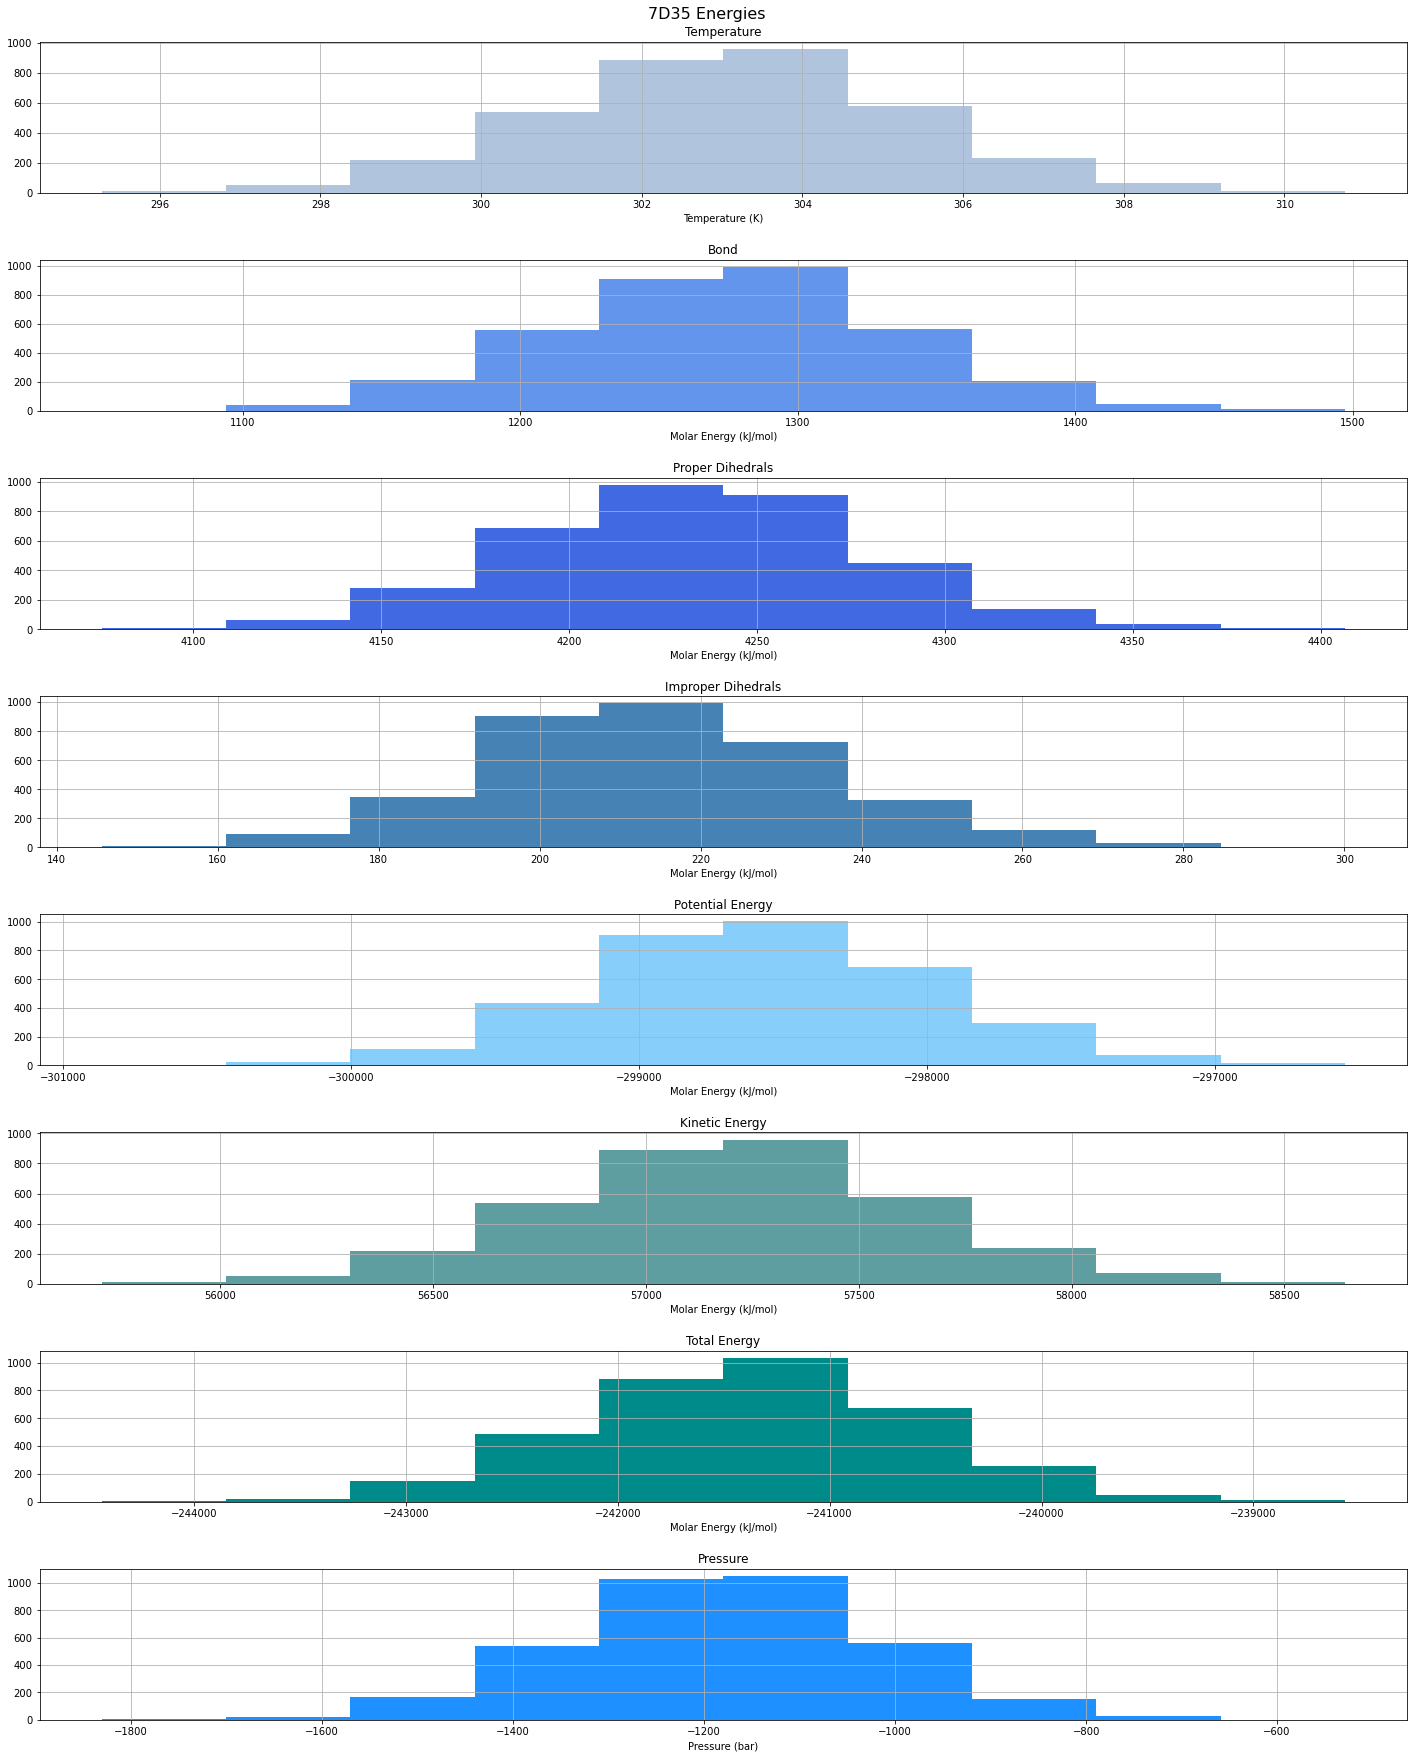

In [17]:
fig, axs = plt.subplots(8, figsize=(20,25))

axs[0].title.set_text('Temperature')
axs[0].hist(temperature, color='lightsteelblue')
axs[0].set_xlabel("Temperature (K)")
axs[0].grid()

axs[1].title.set_text('Bond')
axs[1].hist(bond, color="cornflowerblue")
axs[1].set_xlabel("Molar Energy (kJ/mol)")
axs[1].grid()

axs[2].title.set_text('Proper Dihedrals')
axs[2].hist(proper_dihedrals, color="royalblue")
axs[2].set_xlabel("Molar Energy (kJ/mol)")
axs[2].grid()

axs[3].title.set_text('Improper Dihedrals')
axs[3].hist(improper_dihedrals, color="steelblue")
axs[3].set_xlabel("Molar Energy (kJ/mol)")
axs[3].grid()

axs[4].title.set_text('Potential Energy')
axs[4].hist(potential, color="lightskyblue")
axs[4].set_xlabel("Molar Energy (kJ/mol)")
axs[4].grid()

axs[5].title.set_text('Kinetic Energy')
axs[5].hist(kinetic, color="cadetblue")
axs[5].set_xlabel("Molar Energy (kJ/mol)")
axs[5].grid()

axs[6].title.set_text('Total Energy')
axs[6].hist(total_energy, color="darkcyan")
axs[6].set_xlabel("Molar Energy (kJ/mol)")
axs[6].grid()

axs[7].title.set_text('Pressure')
axs[7].hist(pressure, color="dodgerblue")
axs[7].set_xlabel("Pressure (bar)")
axs[7].grid()

fig.suptitle('7D35 Energies', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

In [18]:
### RMSF 

In [19]:
protein1 = u1.select_atoms("protein")
protein2 = u2.select_atoms("protein")
protein3 = u3.select_atoms("protein")

# TODO: Need to center and make whole (this test trajectory
# contains the protein being split across periodic boundaries
# and the results will be WRONG!)

# Fit to the initial frame to get a better average structure
# (the trajectory is changed in memory)
prealigner1 = align.AlignTraj(u1, u1, select="protein and name CA", in_memory=True).run()
prealigner2 = align.AlignTraj(u2, u2, select="protein and name CA", in_memory=True).run()
prealigner3 = align.AlignTraj(u3, u3, select="protein and name CA", in_memory=True).run()


# ref = average structure
ref_coordinates1 = u1.trajectory.timeseries(asel=protein).mean(axis=1)
ref_coordinates2 = u2.trajectory.timeseries(asel=protein).mean(axis=1)
ref_coordinates3 = u3.trajectory.timeseries(asel=protein).mean(axis=1)

# Make a reference structure (need to reshape into a
# 1-frame "trajectory").
ref1 = mda.Merge(protein1).load_new(ref_coordinates1[:, None, :], order="afc")
ref2 = mda.Merge(protein2).load_new(ref_coordinates2[:, None, :], order="afc")
ref3 = mda.Merge(protein3).load_new(ref_coordinates3[:, None, :], order="afc")


NameError: name 'u1' is not defined

In [20]:
aligner1 = align.AlignTraj(u1, ref1, select="protein and name CA", in_memory=True).run()
aligner2 = align.AlignTraj(u2, ref2, select="protein and name CA", in_memory=True).run()
aligner3 = align.AlignTraj(u3, ref3, select="protein and name CA", in_memory=True).run()


# need to write the trajectory to disk for PMDA 0.3.0 (see issue #15)
with mda.Writer("rmsfit-test1.xtc", n_atoms=u.atoms.n_atoms) as W:
    for ts in u1.trajectory:
        W.write(u1.atoms)
        
with mda.Writer("rmsfit-test2.xtc", n_atoms=u.atoms.n_atoms) as W:
    for ts in u2.trajectory:
        W.write(u2.atoms)
        
with mda.Writer("rmsfit-test3.xtc", n_atoms=u.atoms.n_atoms) as W:
    for ts in u3.trajectory:
        W.write(u3.atoms)

NameError: name 'u1' is not defined

In [21]:
u1 = mda.Universe('7D35_md_100ns.tpr', "rmsfit-test1.xtc")
calphas1 = protein1.select_atoms("protein and name CA")
rmsfer1 = RMSF(calphas1).run()

u2 = mda.Universe('7D35_md_100nsa.tpr', "rmsfit-test2.xtc")
calphas2 = protein2.select_atoms("protein and name CA")
rmsfer2 = RMSF(calphas2).run()

u3 = mda.Universe('7D35_md_100nsb.tpr', "rmsfit-test3.xtc")
calphas3 = protein3.select_atoms("protein and name CA")
rmsfer3 = RMSF(calphas3).run()

FileNotFoundError: [Errno 2] No such file or directory: '7D35_md_100ns.tpr'

NameError: name 'calphas1' is not defined

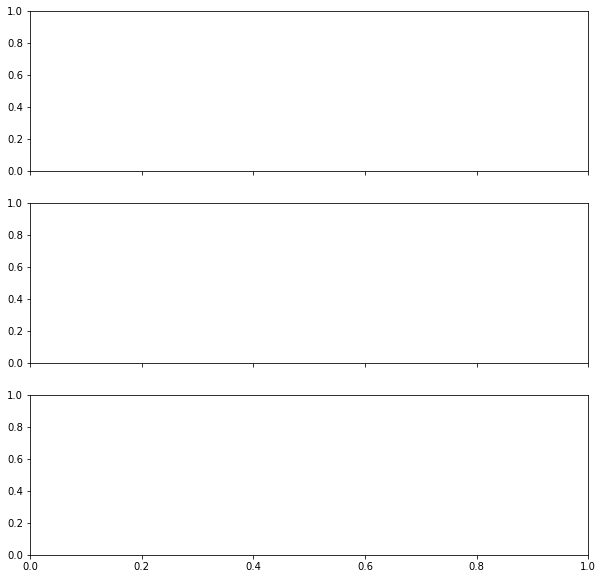

In [22]:
fig, axs = plt.subplots(3, figsize=(10,10), sharex=True)

axs[0].plot(calphas1.resnums, rmsfer1.rmsf)
axs[0].plot()
axs[0].set_ylabel("Ångströms")
axs[0].grid()

axs[1].plot(calphas2.resnums, rmsfer2.rmsf)
axs[1].plot()
axs[1].set_ylabel("Ångströms")
axs[1].grid()

axs[2].plot(calphas3.resnums, rmsfer3.rmsf)
axs[2].plot()
axs[2].set_ylabel("Ångströms")
axs[2].set_xlabel("Residues")
axs[2].grid()

fig.suptitle('RMSF', fontsize=16)

In [23]:
### Analysis 
#https://docs.mdanalysis.org/1.1.1/documentation_pages/analysis_modules.html#building-blocks-for-analysis

In [24]:
### Analysis building blocks
# class MDAnalysis.analysis.base.AnalysisBase

class NewAnalysis():
    def __init__(self, atomgroup):
        super(NewAnalysis, self).__init__(atomgroup.universe.trajectory)
        self._parameter = parameter
        self._ag = atomgroup

    def _prepare(self):
        # OPTIONAL
        # Called before iteration on the trajectory has begun.
        # Data structures can be set up at this time
        self.result = []

    def _single_frame(self):
        # REQUIRED
        # Called after the trajectory is moved onto each new frame.
        # store result of `some_function` for a single frame
        self.result.append(some_function(self._ag, self._parameter))

    def _conclude(self):
        # OPTIONAL
        # Called once iteration on the trajectory is finished.
        # Apply normalisation and averaging to results here.
        self.result = np.asarray(self.result) / np.sum(self.result)

In [25]:
####
def rotation_matrix(mobile, ref):
    return mda.analysis.align.rotation_matrix(mobile, ref)[0]

In [26]:
RotationMatrix = AnalysisBase.analysis_class(rotation_matrix)
# rot = RotationMatrix(u.trajectory, mobile, ref).run(step=2)
# print(rot.results)

In [27]:
Rgyr1 = []
protein1 = u1.select_atoms("protein")
for ts in u1.trajectory:
    Rgyr1.append((u1.trajectory.time, protein1.radius_of_gyration()))
Rgyr1 = np.array(Rgyr1)
x1 = Rgyr1[:,0]
y1 = Rgyr1[:,1]

Rgyr2 = []
protein2 = u2.select_atoms("protein")
for ts in u2.trajectory:
    Rgyr2.append((u2.trajectory.time, protein2.radius_of_gyration()))
Rgyr2 = np.array(Rgyr2)
x2 = Rgyr2[:,0]
y2 = Rgyr2[:,1]

Rgyr3 = []
protein3 = u3.select_atoms("protein")
for ts in u3.trajectory:
    Rgyr3.append((u3.trajectory.time, protein3.radius_of_gyration()))
Rgyr3 = np.array(Rgyr3)
x3 = Rgyr3[:,0]
y3 = Rgyr3[:,1]

fig, axs = plt.subplots(3, figsize=(10,10), sharex=True)
axs[0].plot(Rgyr1[:,0], Rgyr1[:,1], 'b--', lw=2, label=r"$R_G$")
axs[0].plot()
axs[0].set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
axs[0].grid()

axs[1].plot(Rgyr2[:,0], Rgyr2[:,1], 'b--', lw=2, label=r"$R_G$")
axs[1].plot()
axs[1].set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
axs[1].grid()

axs[2].plot(Rgyr3[:,0], Rgyr3[:,1], 'b--', lw=2, label=r"$R_G$")
axs[2].plot()
axs[2].set_ylabel(r"radius of gyration $R_G$ ($\AA$)")
axs[2].set_xlabel("time (ps)")
axs[2].grid()

fig.suptitle("Radius of Gyration of 7D35", fontsize=16)

# ax.figure.savefig("Rgyr.pdf")
plt.draw()

NameError: name 'u1' is not defined

In [ ]:
u = universe
ref = universe

import MDAnalysis.analysis.rms

R = MDAnalysis.analysis.rms.RMSD(u, ref,
           select="backbone",             # superimpose on whole backbone of the whole protein
           groupselections=["backbone and (resid 1-29 or resid 60-121 or resid 160-214)",   # CORE
                            "backbone and resid 122-159",                                   # LID
                            "backbone and resid 30-59"])                                    # NMP
R.run()

import matplotlib.pyplot as plt
rmsd = R.rmsd.T   # transpose makes it easier for plotting
time = rmsd[1]
fig, axs = plt.subplots(1, figsize=(10,10))
axs.plot(time, rmsd[2], 'k-',  label="all")
axs.legend(loc="best")
axs.set_xlabel("time (ps)")
axs.set_ylabel(r"RMSD ($\AA$)")
